In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# Data description
Data = pd.read_csv("hotel_bookings.csv")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
# Data unique values in columns
for i in Data.columns:
    print(i)
    print(Data[i].unique())

hotel
['Resort Hotel' 'City Hotel']
is_canceled
[0 1]
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

In [4]:
# Nan replacement
Data["country"] = Data["country"].replace(np.nan, "unspecified", regex=True)
Data["children"] = Data["children"].replace(np.nan, 0, regex=True)
Data["agent"] = Data["agent"].replace(np.nan, 0, regex=True)
Data["company"] = Data["company"].replace(np.nan, 0, regex=True)

# ## Zastąpienie NaN w id company oraz agent zerami
# Data[['agent','company']] = Data[['agent','company']].fillna(0.0)

# ## Zastąpienie  brakujących wartości w kolumnie country modą
# Data['country'].fillna(Data.country.mode().to_string(), inplace=True)

# ## Zastąpienie brakujących wartości w kolumnie children średnią
# Data['children'].fillna(round(Data.children.mean()), inplace=True)

# ## Usunięcie wierszy z wartością zero w kolumnach adults, babies, children
# Data = Data.drop(Data[(Data.adults+Data.babies+Data.children)==0].index)

# # Zamiana typów float na int
# Data[['children', 'company', 'agent']] = Data[['children', 'company', 'agent']].astype('int64')


In [5]:
# dividing to data and target
ToDrop = ["is_canceled","arrival_date_year","arrival_date_week_number","adr","reservation_status","reservation_status_date"]
XbeforeEncoding = Data.drop(columns=ToDrop)
y= Data["is_canceled"]
XbeforeEncoding

,hotel,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,342,July,1,0,0,2,0.0,0,BB,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0,0
1,Resort Hotel,737,July,1,0,0,2,0.0,0,BB,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0,0
2,Resort Hotel,7,July,1,0,1,1,0.0,0,BB,...,A,C,0,No Deposit,0.0,0.0,0,Transient,0,0
3,Resort Hotel,13,July,1,0,1,1,0.0,0,BB,...,A,A,0,No Deposit,304.0,0.0,0,Transient,0,0
4,Resort Hotel,14,July,1,0,2,2,0.0,0,BB,...,A,A,0,No Deposit,240.0,0.0,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,August,30,2,5,2,0.0,0,BB,...,A,A,0,No Deposit,394.0,0.0,0,Transient,0,0
119386,City Hotel,102,August,31,2,5,3,0.0,0,BB,...,E,E,0,No Deposit,9.0,0.0,0,Transient,0,2
119387,City Hotel,34,August,31,2,5,2,0.0,0,BB,...,D,D,0,No Deposit,9.0,0.0,0,Transient,0,4
119388,City Hotel,109,August,31,2,5,2,0.0,0,BB,...,A,A,0,No Deposit,89.0,0.0,0,Transient,0,0


In [6]:
encoder = OneHotEncoder(sparse=False)
ColsToEncode = XbeforeEncoding[["hotel","arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"]]
Encoded = encoder.fit_transform(ColsToEncode)
Encoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [8]:
colnames = []
for cat in encoder.categories_[0]:
  colnames.append(f'hotel_{cat}')
for cat in encoder.categories_[1]:
  colnames.append(f'arrival_date_month_{cat}')
for cat in encoder.categories_[2]:
  colnames.append(f'meal_{cat}')
for cat in encoder.categories_[3]:
  colnames.append(f'country_{cat}')
for cat in encoder.categories_[4]:
  colnames.append(f'market_segment_{cat}')
for cat in encoder.categories_[5]:
  colnames.append(f'distribution_channel_{cat}')
for cat in encoder.categories_[6]:
  colnames.append(f'reserved_room_type_{cat}')
for cat in encoder.categories_[7]:
  colnames.append(f'assigned_room_type_{cat}')
for cat in encoder.categories_[8]:
  colnames.append(f'deposit_type_{cat}')
for cat in encoder.categories_[9]:
  colnames.append(f'customer_type_{cat}')

In [9]:
XbeforeEncoding

,hotel,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,342,July,1,0,0,2,0.0,0,BB,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0,0
1,Resort Hotel,737,July,1,0,0,2,0.0,0,BB,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0,0
2,Resort Hotel,7,July,1,0,1,1,0.0,0,BB,...,A,C,0,No Deposit,0.0,0.0,0,Transient,0,0
3,Resort Hotel,13,July,1,0,1,1,0.0,0,BB,...,A,A,0,No Deposit,304.0,0.0,0,Transient,0,0
4,Resort Hotel,14,July,1,0,2,2,0.0,0,BB,...,A,A,0,No Deposit,240.0,0.0,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,August,30,2,5,2,0.0,0,BB,...,A,A,0,No Deposit,394.0,0.0,0,Transient,0,0
119386,City Hotel,102,August,31,2,5,3,0.0,0,BB,...,E,E,0,No Deposit,9.0,0.0,0,Transient,0,2
119387,City Hotel,34,August,31,2,5,2,0.0,0,BB,...,D,D,0,No Deposit,9.0,0.0,0,Transient,0,4
119388,City Hotel,109,August,31,2,5,2,0.0,0,BB,...,A,A,0,No Deposit,89.0,0.0,0,Transient,0,0


In [10]:
X = pd.DataFrame(Encoded, columns=colnames)
X[["lead_time","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","agent","company","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests"]] = XbeforeEncoding[["lead_time","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled","booking_changes","agent","company","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

In [11]:
for i in X_train.columns:
    print(i)
X_train

hotel_City Hotel
hotel_Resort Hotel
arrival_date_month_April
arrival_date_month_August
arrival_date_month_December
arrival_date_month_February
arrival_date_month_January
arrival_date_month_July
arrival_date_month_June
arrival_date_month_March
arrival_date_month_May
arrival_date_month_November
arrival_date_month_October
arrival_date_month_September
meal_BB
meal_FB
meal_HB
meal_SC
meal_Undefined
country_ABW
country_AGO
country_AIA
country_ALB
country_AND
country_ARE
country_ARG
country_ARM
country_ASM
country_ATA
country_ATF
country_AUS
country_AUT
country_AZE
country_BDI
country_BEL
country_BEN
country_BFA
country_BGD
country_BGR
country_BHR
country_BHS
country_BIH
country_BLR
country_BOL
country_BRA
country_BRB
country_BWA
country_CAF
country_CHE
country_CHL
country_CHN
country_CIV
country_CMR
country_CN
country_COL
country_COM
country_CPV
country_CRI
country_CUB
country_CYM
country_CYP
country_CZE
country_DEU
country_DJI
country_DMA
country_DNK
country_DOM
country_DZA
country_ECU
coun

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
81713,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,19.0,0.0,44,0,0
81770,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,19.0,0.0,44,0,0
6724,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,240.0,0.0,0,0,0
110704,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,9.0,0.0,0,0,1
105276,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,9.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0,0,0
77655,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,9.0,0.0,0,0,0
79683,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,9.0,0.0,0,0,1
56088,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,9.0,0.0,0,0,1


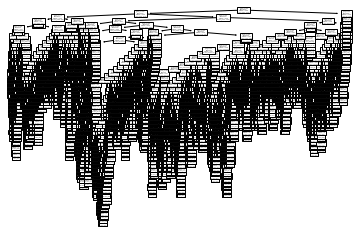

In [12]:
drzewo = DecisionTreeClassifier()
drzewo.fit(X_train, y_train)
plot_tree(drzewo)
plt.show()

In [54]:
pred = drzewo.predict(X_test)
accuracy_score(y_test, pred)

0.8566462852835246

In [65]:
params={'criterion':['gini', 'entropy'],
       'max_depth':[1, 2, 3, 4, 5,6,7,8,9,10]}
grid = GridSearchCV(estimator=drzewo, 
                    param_grid=params, 
                    verbose=10, 
                    scoring='accuracy',
                   cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_,"  \  ",grid.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... criterion=gini, max_depth=1, score=0.749, total=   0.5s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.754, total=   0.5s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.747, total=   0.5s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.752, total=   0.5s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.753, total=   0.6s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.749, total=   0.5s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.2s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.754, total=   0.5s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.8s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.745, total=   0.5s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.3s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.750, total=   0.5s
[CV] criterion=gini, max_depth=1 .....................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.8s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=1, score=0.750, total=   0.5s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.749, total=   0.7s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.755, total=   0.7s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.747, total=   0.7s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.752, total=   0.7s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.754, total=   0.7s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.750, total=   0.7s
[CV] criterion=gini, max_depth=2 .....................................
[CV] .

[CV] ......... criterion=gini, max_depth=7, score=0.820, total=   1.4s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ......... criterion=gini, max_depth=7, score=0.828, total=   1.4s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ......... criterion=gini, max_depth=7, score=0.832, total=   1.4s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ......... criterion=gini, max_depth=8, score=0.825, total=   1.6s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ......... criterion=gini, max_depth=8, score=0.832, total=   1.7s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ......... criterion=gini, max_depth=8, score=0.828, total=   1.6s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ......... criterion=gini, max_depth=8, score=0.827, total=   1.6s
[CV] criterion=gini, max_depth=8 .....................................
[CV] .

[CV] ...... criterion=entropy, max_depth=3, score=0.751, total=   0.8s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.757, total=   0.8s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.749, total=   0.8s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.750, total=   0.9s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.745, total=   0.9s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ...... criterion=entropy, max_depth=4, score=0.764, total=   1.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ...... criterion=entropy, max_depth=4, score=0.771, total=   1.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] .

[CV] ...... criterion=entropy, max_depth=9, score=0.830, total=   1.7s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ...... criterion=entropy, max_depth=9, score=0.834, total=   1.6s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ...... criterion=entropy, max_depth=9, score=0.834, total=   1.6s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ...... criterion=entropy, max_depth=9, score=0.838, total=   1.6s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ...... criterion=entropy, max_depth=9, score=0.828, total=   1.7s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ...... criterion=entropy, max_depth=9, score=0.832, total=   1.6s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ...... criterion=entropy, max_depth=9, score=0.838, total=   1.6s
[CV] criterion=entropy, max_depth=10 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.0min finished


{'criterion': 'gini', 'max_depth': 10}   \   0.83920340499482


In [58]:
print(grid.best_params_,"  \  ",grid.best_score_)

{'criterion': 'gini', 'max_depth': 10}   \   0.8392348142222297


In [62]:
BestGrid =  grid.best_estimator_

[Text(238.83949439218526, 207.55636363636364, 'X[233] <= 0.5\ngini = 0.466\nsamples = 95512\nvalue = [60153, 35359]'),
 Text(147.48188314037628, 187.7890909090909, 'X[239] <= 14.5\ngini = 0.406\nsamples = 83852\nvalue = [60081, 23771]'),
 Text(64.2285455861071, 168.0218181818182, 'X[239] <= 7.5\ngini = 0.215\nsamples = 21395\nvalue = [18780, 2615]'),
 Text(26.40607814761216, 148.25454545454545, 'X[253] <= 0.5\ngini = 0.166\nsamples = 15806\nvalue = [14361, 1445]'),
 Text(25.437047756874097, 128.48727272727274, 'X[154] <= 0.5\ngini = 0.188\nsamples = 13720\nvalue = [12275, 1445]'),
 Text(8.721273516642547, 108.72, 'X[231] <= 0.5\ngini = 0.121\nsamples = 6660\nvalue = [6230, 430]'),
 Text(7.752243125904487, 88.95272727272729, 'X[250] <= 8.5\ngini = 0.119\nsamples = 6652\nvalue = [6230, 422]'),
 Text(3.8761215629522434, 69.18545454545455, 'X[42] <= 0.5\ngini = 0.032\nsamples = 2179\nvalue = [2143, 36]'),
 Text(2.907091172214183, 49.418181818181836, 'X[102] <= 0.5\ngini = 0.032\nsamples = 

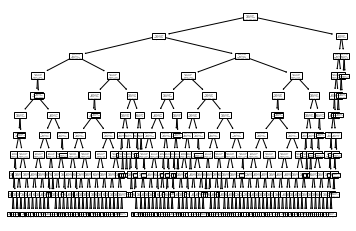

In [60]:
plot_tree(grid.best_estimator_)

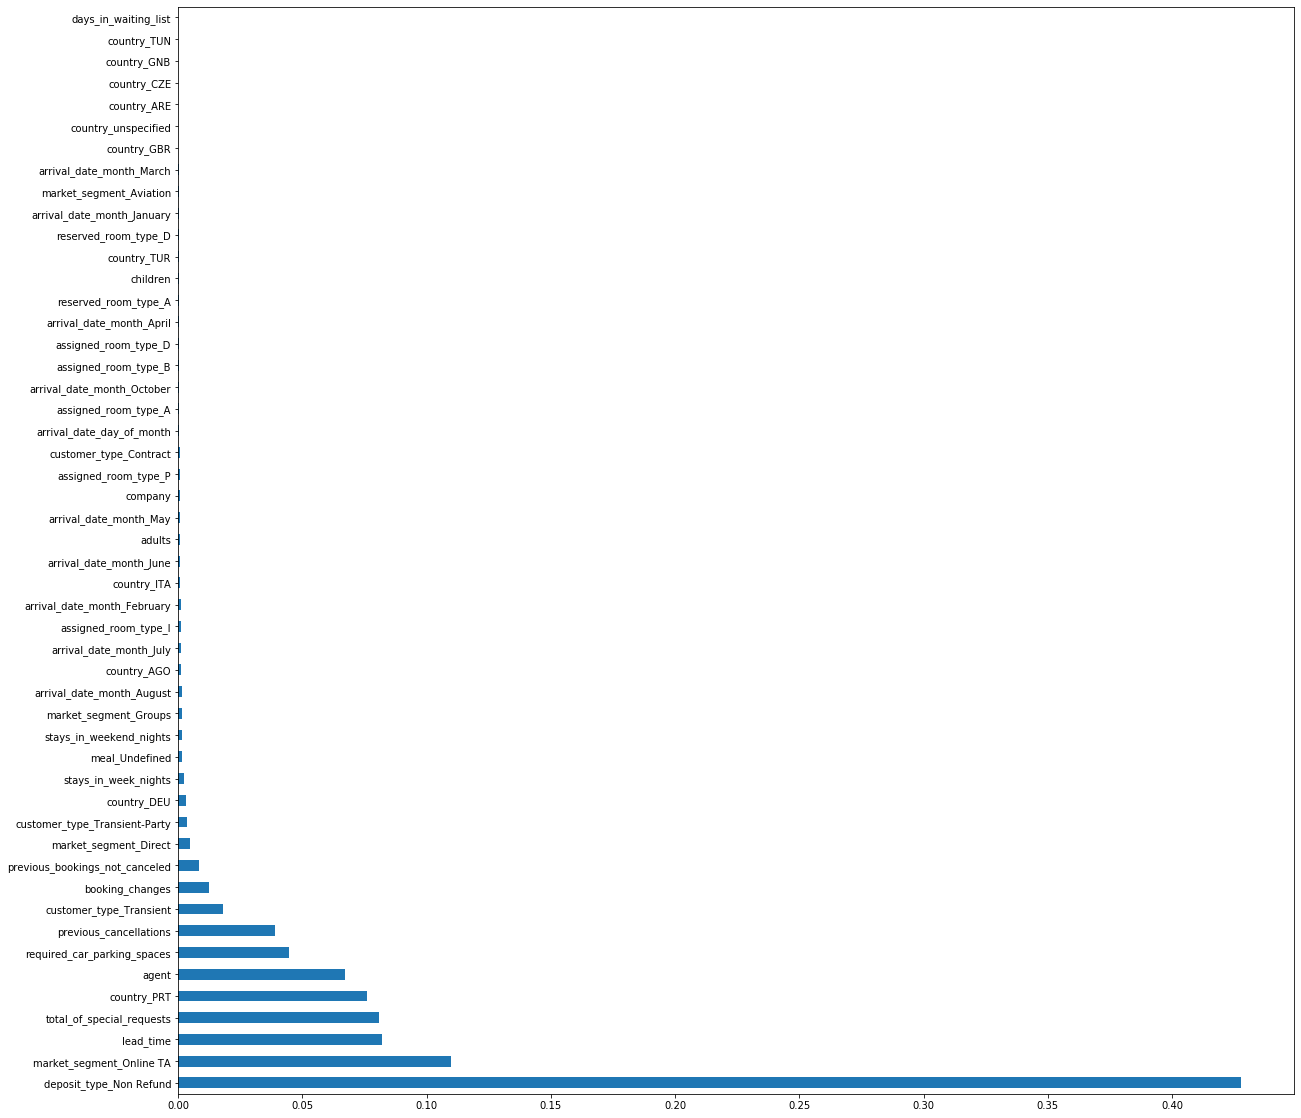

In [63]:
plt.rcParams["figure.figsize"] = (20,20)
feat_importances = pd.Series(BestGrid.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')

Klasyfikacja z wykorzystaniem deep learningu